In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')



In [57]:
# Load the dataset
simData = pd.read_csv("data/earth_orbit_simulation.csv")

# The dataset contains the following columns:
# Input feature (time), X position, Y position
X_feature = simData[['time']]
y_target_x = simData['x']
y_target_y = simData['y']

In [58]:
X_train, X_test, y_train_x, y_test_x = train_test_split(X_feature, y_target_x, test_size=0.2, random_state=42)
_, _, y_train_y, y_test_y = train_test_split(X_feature, y_target_y, test_size=0.2, random_state=42)


In [59]:
param_grid = {
    # Hyperparameters for Random Forest
    # 'n_estimators': [50, 100, 200],
    # increased to include more estimators
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}


In [60]:
grid_search_x = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_x.fit(X_feature, y_target_x)  # You can use full data or X_train/y_train_x if you prefer
best_rf_x = grid_search_x.best_estimator_
y_pred_x_tuned = best_rf_x.predict(X_feature)

print("Best hyperparameters for X:", grid_search_x.best_params_)
print("Best (neg MSE) for X:", grid_search_x.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2,

In [61]:
grid_search_y = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_y.fit(X_feature, y_target_y)
best_rf_y = grid_search_y.best_estimator_
y_pred_y_tuned = best_rf_y.predict(X_feature)

print("Best hyperparameters for Y:", grid_search_y.best_params_)
print("Best (neg MSE) for Y:", grid_search_y.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2,

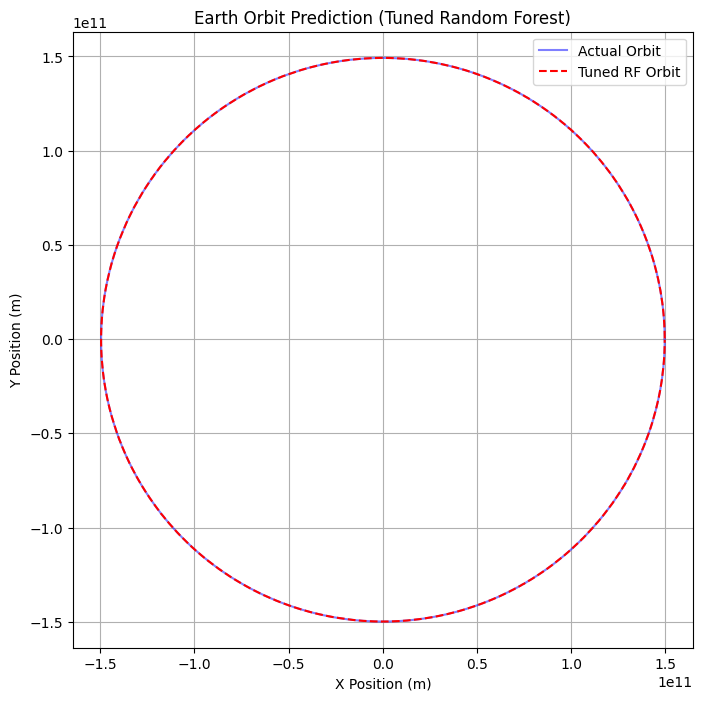

In [62]:
plt.figure(figsize=(8, 8))
plt.plot(y_target_x, y_target_y, label='Actual Orbit', color='blue', alpha=0.5)
plt.plot(y_pred_x_tuned, y_pred_y_tuned, label='Tuned RF Orbit', color='red', linestyle='--')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Earth Orbit Prediction (Tuned Random Forest)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


In [63]:
# Evaluate the model performance

print("Tuned RF R² X:", r2_score(y_target_x, y_pred_x_tuned))
print("Tuned RF MSE X:", mean_squared_error(y_target_x, y_pred_x_tuned))

print("Tuned RF R² Y:", r2_score(y_target_y, y_pred_y_tuned))
print("Tuned RF MSE Y:", mean_squared_error(y_target_y, y_pred_y_tuned))


Tuned RF R² X: 0.9999991957963619
Tuned RF MSE X: 8998283106041012.0
Tuned RF R² Y: 0.9999992442302975
Tuned RF MSE Y: 8444744308408358.0


In [64]:
# Add sin and cos transformation to represent cyclical time
T = 365 * 86400  # One year in seconds

simData['time_sin'] = np.sin(2 * np.pi * simData['time'] / T)
simData['time_cos'] = np.cos(2 * np.pi * simData['time'] / T)


In [65]:
X_cyclic = simData[['time_sin', 'time_cos']]


In [66]:
X_train, X_test, y_train_x, y_test_x = train_test_split(X_cyclic, y_target_x, test_size=0.2, random_state=42)
_, _, y_train_y, y_test_y = train_test_split(X_cyclic, y_target_y, test_size=0.2, random_state=42)


In [67]:
# Use the same param_grid as before
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# For X
grid_search_x = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)
grid_search_x.fit(X_train, y_train_x)
best_rf_x = grid_search_x.best_estimator_
y_pred_x_tuned = best_rf_x.predict(X_cyclic)

# For Y
grid_search_y = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n

In [68]:
grid_search_y.fit(X_train, y_train_y)
best_rf_y = grid_search_y.best_estimator_
y_pred_y_tuned = best_rf_y.predict(X_cyclic)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

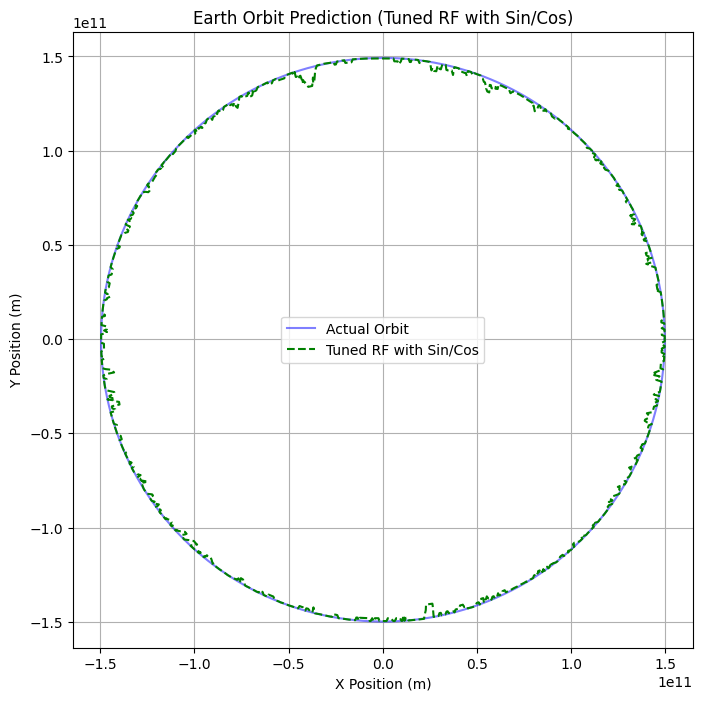

In [69]:
plt.figure(figsize=(8, 8))
plt.plot(y_target_x, y_target_y, label='Actual Orbit', color='blue', alpha=0.5)
plt.plot(y_pred_x_tuned, y_pred_y_tuned, label='Tuned RF with Sin/Cos', color='green', linestyle='--')

plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Earth Orbit Prediction (Tuned RF with Sin/Cos)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

In [70]:
print("Tuned RF with Sin/Cos R² X:", r2_score(y_target_x, y_pred_x_tuned))
print("Tuned RF with Sin/Cos MSE X:", mean_squared_error(y_target_x, y_pred_x_tuned))

print("Tuned RF with Sin/Cos R² Y:", r2_score(y_target_y, y_pred_y_tuned))
print("Tuned RF with Sin/Cos MSE Y:", mean_squared_error(y_target_y, y_pred_y_tuned))

Tuned RF with Sin/Cos R² X: 0.9999231170565375
Tuned RF with Sin/Cos MSE X: 8.602479005339946e+17
Tuned RF with Sin/Cos R² Y: 0.9998703174740468
Tuned RF with Sin/Cos MSE Y: 1.4490337060281487e+18


In [71]:
# ## 🌐 Feature Engineering with Sine and Cosine: A Case Study in Random Forest Regression

# To explore the effect of cyclical transformations on model performance, we applied sine and cosine functions to the `time` variable, creating two new features: `time_sin` and `time_cos`. The intent was to represent the periodic nature of Earth's orbit, based on the fact that a full orbit completes every year (T = 365 days × 86400 seconds).

# ### ⛏ Motivation
# Sine and cosine transformations are commonly used to encode cyclical data (e.g., time of year, day of week), especially in linear models which cannot naturally model periodicity.

# ### 🧪 Implementation
# We created the features:
# - `time_sin = sin(2πt/T)`
# - `time_cos = cos(2πt/T)`

# These were used as new input features for the Random Forest Regression model.

# ### 📉 Outcome
# Surprisingly, model performance **decreased** significantly:
# - **R² values** remained high, but **MSE values** increased drastically.
# - The orbit plot became jagged and less accurate compared to the simpler model without these features.

# ### 📌 Key Insight
# > "Just because we add a feature that seems mathematically relevant, doesn’t mean it improves the model."

# Random Forests are already good at modeling non-linear relationships. Adding sine and cosine:
# - Introduced **unnecessary noise**.
# - Created **high-frequency splits** that disrupted the model's ability to generalize.
# - Did **not provide additional meaningful information** that the model couldn't already learn from raw time.

# ### ✅ Conclusion
# While feature engineering can be powerful, its effectiveness depends on the model. For tree-based models like Random Forests, **adding complex transformations can sometimes hurt more than help**. This experiment highlights the importance of aligning feature choices with model behavior and evaluating their real-world impact — not just their theoretical appeal.
